# Application of ResNET50 and VGG16 Modified & Trained models to Landuse Classification of Bangalore.

# Application of VGG16 based modified model (futher changed and trained on Landcover.ai) for Segmentation Tasks for bangalore


**Applying these models landuse Classification map  and segmentation mapo of Bangalore based on Sentinel Satellite 10m RGB Data from 2021 sourced from GOOGLE EARTH ENGINE**

# Reading the Image Sentinel_2021.tif

In [2]:
import cv2
import numpy as np
import os

# Function to replace NaN values and normalize the image
def preprocess_image(image):
    # Replace NaN values with 0
    image = np.nan_to_num(image, nan=0.0)

    # Normalize to [0, 255] for saving as JPEG
    image = (255 * (image - np.min(image)) / (np.max(image) - np.min(image))).astype(np.uint8)

    return image

# Function to convert a single TIFF file to JPEG
def convert_tiff_to_jpeg_with_preprocessing(tiff_path, jpeg_path):
    # Read the TIFF image
    tiff_image = cv2.imread(tiff_path, cv2.IMREAD_UNCHANGED)

    # Check if the image was loaded successfully
    if tiff_image is None:
        print(f"Error: Unable to read the TIFF file at {tiff_path}")
        return

    # Preprocess the image to handle NaN values and normalize
    processed_image = preprocess_image(tiff_image)

    # Write the preprocessed image in JPEG format
    success = cv2.imwrite(jpeg_path, processed_image)

    # Check if the image was written successfully
    if success:
        print(f"Successfully converted {tiff_path} to {jpeg_path}")
    else:
        print(f"Error: Failed to write the JPEG file at {jpeg_path}")

# Function to batch convert TIFF files to JPEG in the same directory
def batch_convert_tiff_to_jpeg_with_preprocessing(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            tiff_path = os.path.join(directory, filename)
            jpeg_path = os.path.join(directory, filename.replace(".tif", ".jpg").replace(".tiff", ".jpg"))
            convert_tiff_to_jpeg_with_preprocessing(tiff_path, jpeg_path)

# Directory containing TIFF files
directory = r"D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images"

# Perform the batch conversion
batch_convert_tiff_to_jpeg_with_preprocessing(directory)

Successfully converted D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2018.tif to D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2018.jpg
Successfully converted D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2021.tif to D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2021.jpg
Successfully converted D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2024.tif to D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2024.jpg


In [5]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
# Open the TIFF file
tiff_path = r"D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2021.tif"

with rasterio.open(tiff_path) as src:
    print(src.profile)  # Display metadata
    bands = src.read((1, 2, 3))  # Read RGB bands (B4, B3, B2)

# Check the image dimensions
print(f"Image Shape: {bands.shape}")  # (Bands, Height, Width)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 5122, 'height': 5012, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 77.3599478279356,
       0.0, -8.983152841195215e-05, 13.250150440762942), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
Image Shape: (3, 5012, 5122)


# NaN Value Check

In [6]:
# Check for NaN or Infinite values
print("NaN in bands:", np.isnan(bands).any())
print("Infinite in bands:", np.isinf(bands).any())

# Get min and max values for all bands
print("Min pixel value:", bands.min())
print("Max pixel value:", bands.max())

NaN in bands: True
Infinite in bands: False
Min pixel value: nan
Max pixel value: nan


In [7]:
# Replace NaN values with 0
bands = np.nan_to_num(bands, nan=0.0)

# Check again for NaN or Infinite values
print("NaN in bands (after replacement):", np.isnan(bands).any())
print("Infinite in bands (after replacement):", np.isinf(bands).any())

NaN in bands (after replacement): False
Infinite in bands (after replacement): False


# Displaying the Image - Bangalore 2021 - 10m

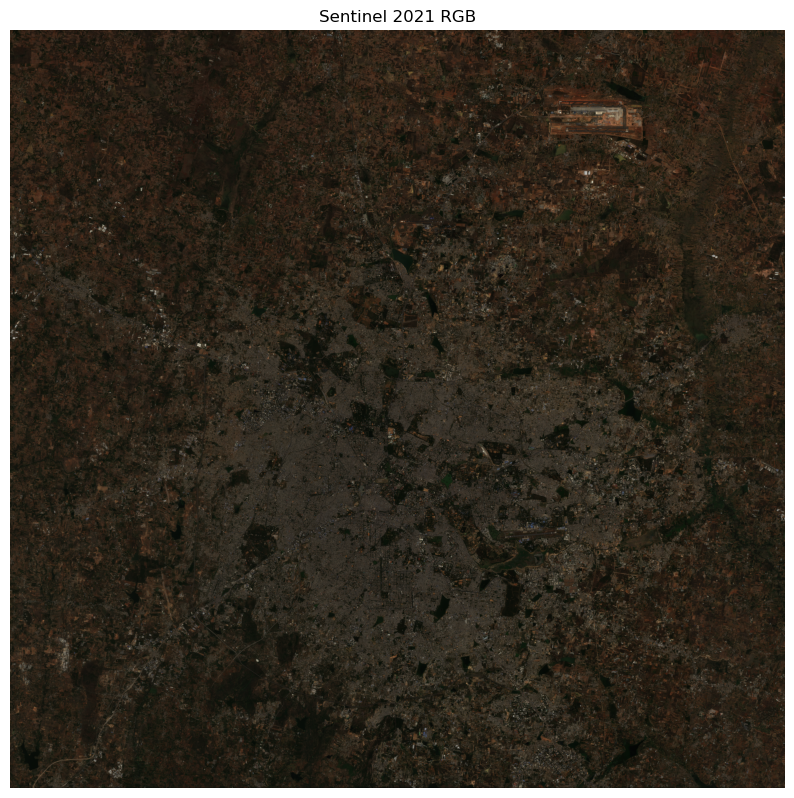

In [8]:
# Transpose for correct orientation (Rasterio loads as [Bands, Height, Width])
image_rgb = bands.transpose(1, 2, 0)

# Normalize pixel values for better visualization
image_rgb = image_rgb / image_rgb.max()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title("Sentinel 2021 RGB")
plt.axis("off")
plt.show()

In [10]:
import numpy as np

patch_size=64

# Function to pad the image
def pad_image(image, patch_size):
    # Calculate the padding needed for height and width
    pad_height = (patch_size - (image.shape[0] % patch_size)) % patch_size
    pad_width = (patch_size - (image.shape[1] % patch_size)) % patch_size

    # Pad the image (padding applied to the bottom and right edges)
    padded_image = np.pad(
        image,
        ((0, pad_height), (0, pad_width), (0, 0)),  # (height, width, channels)
        mode='constant',  # Padding with 0 (black pixels)
        constant_values=0
    )
    return padded_image, pad_height, pad_width

# Pad the Sentinel image
padded_image, pad_height, pad_width = pad_image(image_rgb, patch_size)

# Output the new dimensions
print(f"Original image shape: {image_rgb.shape}")
print(f"Padded image shape: {padded_image.shape}")
print(f"Padding added (height, width): ({pad_height}, {pad_width})")

Original image shape: (5012, 5122, 3)
Padded image shape: (5056, 5184, 3)
Padding added (height, width): (44, 62)


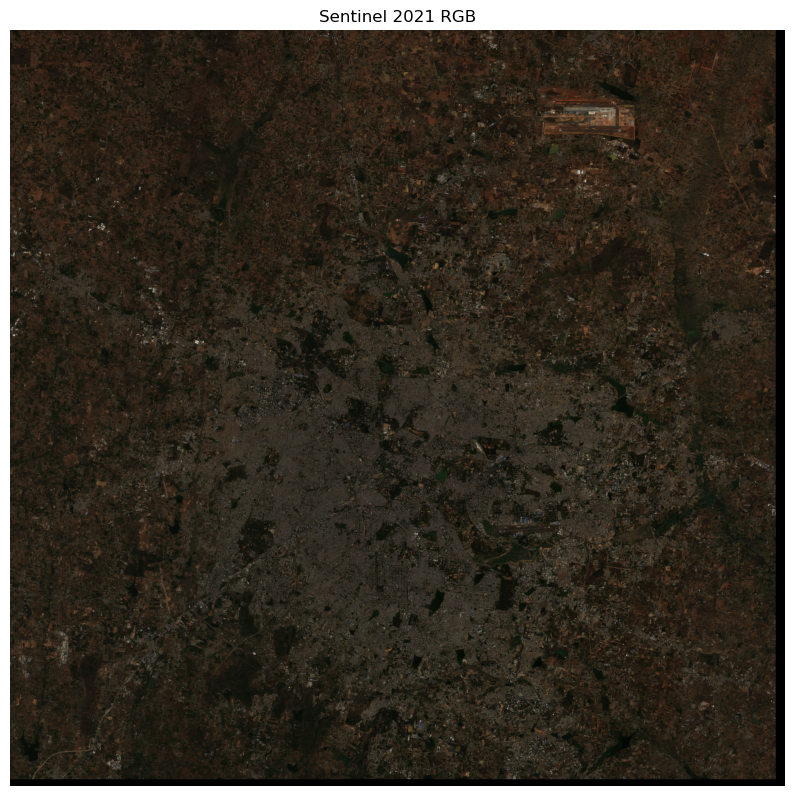

In [11]:
# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(padded_image)
plt.title("Sentinel 2021 RGB")
plt.axis("off")
plt.show()

# Patch Extraction (64x64) for Patch Wise prediction with Trained Model

In [12]:
# Function to extract 64x64 patches
def extract_patches(image, patch_size):
    patches = []
    coords = []  # Store coordinates of the top-left corner of each patch
    for i in range(0, image.shape[0], patch_size):  # Loop over height
        for j in range(0, image.shape[1], patch_size):  # Loop over width
            patch = image[i:i+patch_size, j:j+patch_size, :]  # Extract patch
            patches.append(patch)
            coords.append((i, j))  # Save top-left coordinate
    return np.array(patches), coords

# Extract patches from the padded image
patches, coords = extract_patches(padded_image, patch_size)

# Output details
print(f"Total patches extracted: {len(patches)}")
print(f"Shape of each patch: {patches[0].shape}")  # Expect (64, 64, 3)
print(f"Coordinates of first patch: {coords[0]}")  # (row, col)

Total patches extracted: 6399
Shape of each patch: (64, 64, 3)
Coordinates of first patch: (0, 0)


# Loading the Model We Trained on EuroSAT RGB

In [9]:
import tensorflow as tf

# Load the pre-trained model
model_path = r"D:\Nitin\MS - AAI\4. Computer Vision\Project\EuroSAT_ResNet50_Model.keras"
eurosat_model = tf.keras.models.load_model(model_path)

# Verify the model structure
eurosat_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 72,336,160 (275.94 MB)

 Trainable params: 24,094,090 (91.91 MB)

 Non-trainable params: 53,888 (210.50 KB)

 Optimizer params: 48,188,182 (183.82 MB)

# Running the Patch Wise Prediction 

In [22]:
import tensorflow as tf
import os
import sys

# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Initialize a list to store the class predictions
classified_patches = []

# Total number of patches
total_patches = len(patches)

# Function to update the progress bar
def update_progress(current, total):
    progress = (current / total) * 100
    bar_length = 40  # Length of the progress bar
    filled_length = int(bar_length * current // total)
    bar = '█' * filled_length + '-' * (bar_length - filled_length)
    sys.stdout.write(f"\rProgress: |{bar}| {progress:.2f}%")
    sys.stdout.flush()

# Loop through the patches and classify each
for idx, patch in enumerate(patches):
    # Reshape the patch for the model (add a batch dimension)
    patch_reshaped = patch[np.newaxis, ...]  # Shape: (1, 64, 64, 3)

    # Resize the patch to 224x224
    patch_resized = tf.image.resize(patch_reshaped, (224, 224))

    # Predict the class of the patch
    prediction = eurosat_model.predict(patch_resized, verbose=0)  # Suppress prediction logs
    predicted_class = np.argmax(prediction)  # Get the class index

    # Append the predicted class to the list
    classified_patches.append(predicted_class)

    # Update the progress bar
    update_progress(idx + 1, total_patches)

# Final update after loop completion
sys.stdout.write(f"\nClassification completed! Total patches processed: {total_patches}\n")

Progress: |████████████████████████████████████████| 100.00%
Classification completed! Total patches processed: 6399


57

# Creating the Classification map

In [23]:
import numpy as np

# Create an empty classification map with the padded image dimensions
classification_map = np.zeros((padded_image.shape[0], padded_image.shape[1]))

# Populate the classification map using the patch predictions
for (i, j), predicted_class in zip(coords, classified_patches):
    classification_map[i:i+patch_size, j:j+patch_size] = predicted_class

# Remove padding to return to the original image size
classification_map = classification_map[:image_rgb.shape[0], :image_rgb.shape[1]]

# Verify the reconstructed map dimensions
print(f"Classification map shape: {classification_map.shape}")

Classification map shape: (5012, 5122)


In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# EuroSAT classes
eurosat_classes = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
                   'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

# Assign a unique color to each class
class_colors = ['#ffff00', '#008000', '#7cfc00', '#ff4500', '#8b0000',
                '#adff2f', '#ff6347', '#4682b4', '#0000ff', '#87ceeb']

# Create a colormap for the classification map
colormap = ListedColormap(class_colors)

# Visualization of Classification Map

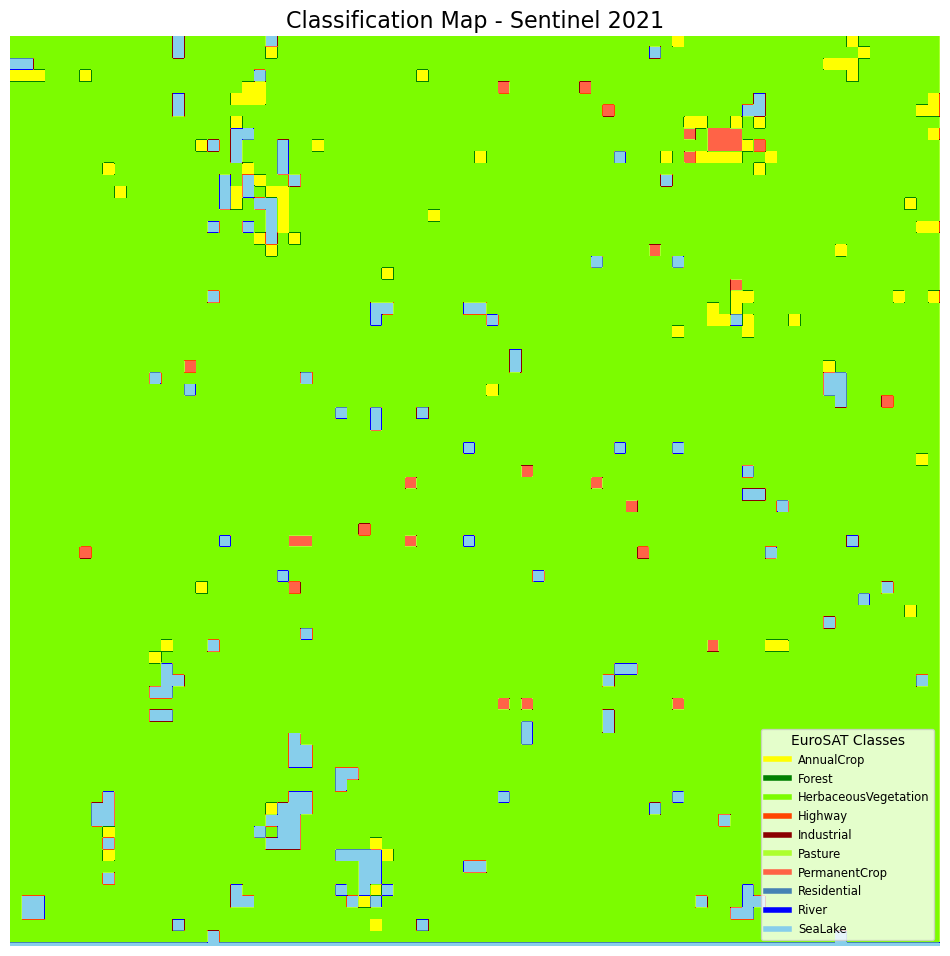

In [28]:
# Plot the classification map
plt.figure(figsize=(12, 12))
plt.imshow(classification_map, cmap=colormap)
plt.title("Classification Map - Bangalore - Sentinel 2021", fontsize=16)
plt.axis("off")

# Add a legend
legend_elements = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=eurosat_classes[i])
                   for i in range(len(eurosat_classes))]
plt.legend(handles=legend_elements, loc='lower right', fontsize='small', title="EuroSAT Classes")
plt.show()

In [1]:
import tensorflow as tf

# Load the pre-trained model
model_path = r"D:\Nitin\MS - AAI\4. Computer Vision\Project\EuroSAT_VGG16_Model.keras"
eurosat_vgg_model = tf.keras.models.load_model(model_path)

# Verify the model structure
eurosat_vgg_model.summary()

C:\Users\nitin\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 38 variables whereas the saved optimizer has 74 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 42,345,622 (161.54 MB)

 Trainable params: 21,172,426 (80.77 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 21,172,428 (80.77 MB)

In [16]:
import tensorflow as tf
import os
import sys

# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Initialize a list to store the class predictions
classified_patches = []

# Total number of patches
total_patches = len(patches)

# Function to update the progress bar
def update_progress(current, total):
    progress = (current / total) * 100
    bar_length = 40  # Length of the progress bar
    filled_length = int(bar_length * current // total)
    bar = '█' * filled_length + '-' * (bar_length - filled_length)
    sys.stdout.write(f"\rProgress: |{bar}| {progress:.2f}%")
    sys.stdout.flush()

# Loop through the patches and classify each
for idx, patch in enumerate(patches):
    # Reshape the patch for the model (add a batch dimension)
    patch_reshaped = patch[np.newaxis, ...]  # Shape: (1, 64, 64, 3)

    # Resize the patch to 224x224
    patch_resized = tf.image.resize(patch_reshaped, (224, 224))

    # Predict the class of the patch
    prediction = eurosat_vgg_model.predict(patch_resized, verbose=0)  # Suppress prediction logs
    predicted_class = np.argmax(prediction)  # Get the class index

    # Append the predicted class to the list
    classified_patches.append(predicted_class)

    # Update the progress bar
    update_progress(idx + 1, total_patches)

# Final update after loop completion
sys.stdout.write(f"\nClassification completed! Total patches processed: {total_patches}\n")

Progress: |████████████████████████████████████████| 100.00%
Classification completed! Total patches processed: 6399


57

In [17]:
import numpy as np

# Create an empty classification map with the padded image dimensions
classification_map = np.zeros((padded_image.shape[0], padded_image.shape[1]))

# Populate the classification map using the patch predictions
for (i, j), predicted_class in zip(coords, classified_patches):
    classification_map[i:i+patch_size, j:j+patch_size] = predicted_class

# Remove padding to return to the original image size
classification_map = classification_map[:image_rgb.shape[0], :image_rgb.shape[1]]

# Verify the reconstructed map dimensions
print(f"Classification map shape: {classification_map.shape}")

Classification map shape: (5012, 5122)


In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# EuroSAT classes
eurosat_classes = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
                   'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

# Assign a unique color to each class
class_colors = ['#ffff00', '#008000', '#7cfc00', '#ff4500', '#8b0000',
                '#adff2f', '#ff6347', '#4682b4', '#0000ff', '#87ceeb']

# Create a colormap for the classification map
colormap = ListedColormap(class_colors)

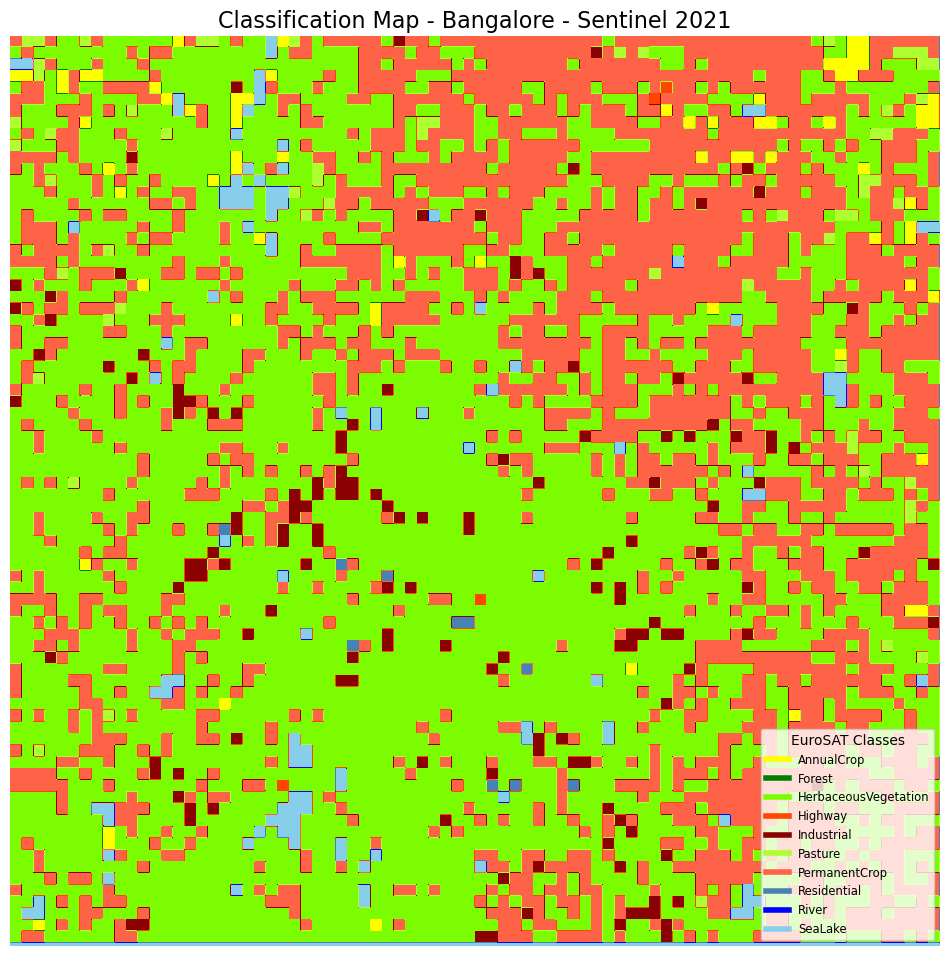

In [20]:
# Plot the classification map
plt.figure(figsize=(12, 12))
plt.imshow(classification_map, cmap=colormap)
plt.title("Classification Map - Bangalore - Sentinel 2021", fontsize=16)
plt.axis("off")

# Add a legend
legend_elements = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=eurosat_classes[i])
                   for i in range(len(eurosat_classes))]
plt.legend(handles=legend_elements, loc='lower right', fontsize='small', title="EuroSAT Classes")
plt.show()

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 9649, 'height': 3713, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(2.694945852358565e-05, 0.0, 77.55997569225049,
       0.0, -2.694945852358565e-05, 13.000041499358385), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
Image Shape: (3, 3713, 9649)
NaN in bands: True
Infinite in bands: False
Min pixel value: nan
Max pixel value: nan
NaN in bands (after replacement): False
Infinite in bands (after replacement): False


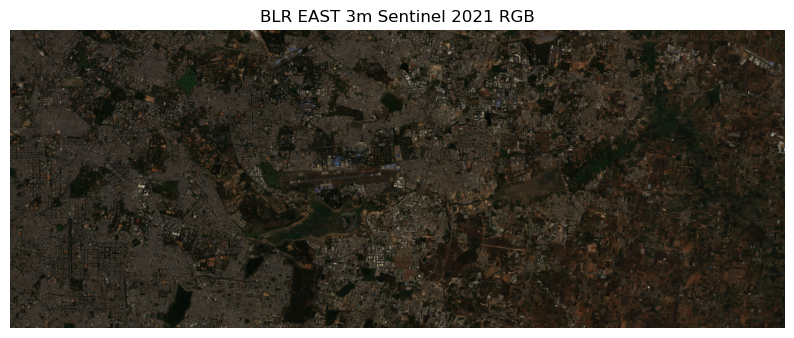

In [22]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
# Open the TIFF file

# "D:\Nitin\MS - AAI\4. Computer Vision\Project\V2 - East_Blr_3m\Blr_3m_Sentinel_2021.tif"
tiff_path = r"D:\Nitin\MS - AAI\4. Computer Vision\Project\V2 - East_Blr_3m\Blr_3m_Sentinel_2021.tif"

with rasterio.open(tiff_path) as src:
    print(src.profile)  # Display metadata
    bands = src.read((1, 2, 3))  # Read RGB bands (B4, B3, B2)

# Check the image dimensions
print(f"Image Shape: {bands.shape}")  # (Bands, Height, Width)

# Check for NaN or Infinite values
print("NaN in bands:", np.isnan(bands).any())
print("Infinite in bands:", np.isinf(bands).any())

# Get min and max values for all bands
print("Min pixel value:", bands.min())
print("Max pixel value:", bands.max())

# Replace NaN values with 0
bands = np.nan_to_num(bands, nan=0.0)

# Check again for NaN or Infinite values
print("NaN in bands (after replacement):", np.isnan(bands).any())
print("Infinite in bands (after replacement):", np.isinf(bands).any())

# Transpose for correct orientation (Rasterio loads as [Bands, Height, Width])
image_rgb_3m = bands.transpose(1, 2, 0)

# Normalize pixel values for better visualization
image_rgb_3m = image_rgb_3m / image_rgb_3m.max()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb_3m)
plt.title("BLR EAST 3m Sentinel 2021 RGB")
plt.axis("off")
plt.show()

Original image shape: (3713, 9649, 3)
Padded image shape: (3744, 9664, 3)
Padding added (height, width): (31, 15)


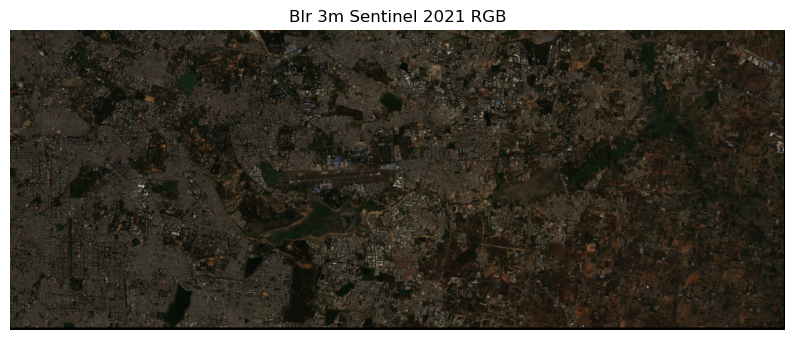

Total patches extracted: 35334
Shape of each patch: (32, 32, 3)
Coordinates of first patch: (0, 0)


In [29]:
import numpy as np

patch_size_3m=32

# Function to pad the image
def pad_image(image, patch_size):
    # Calculate the padding needed for height and width
    pad_height = (patch_size - (image.shape[0] % patch_size)) % patch_size
    pad_width = (patch_size - (image.shape[1] % patch_size)) % patch_size

    # Pad the image (padding applied to the bottom and right edges)
    padded_image = np.pad(
        image,
        ((0, pad_height), (0, pad_width), (0, 0)),  # (height, width, channels)
        mode='constant',  # Padding with 0 (black pixels)
        constant_values=0
    )
    return padded_image, pad_height, pad_width

# Pad the Sentinel image
padded_image_3m, pad_height_3m, pad_width_3m = pad_image(image_rgb_3m, patch_size_3m)

# Output the new dimensions
print(f"Original image shape: {image_rgb_3m.shape}")
print(f"Padded image shape: {padded_image_3m.shape}")
print(f"Padding added (height, width): ({pad_height_3m}, {pad_width_3m})")

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(padded_image_3m)
plt.title("Blr 3m Sentinel 2021 RGB")
plt.axis("off")
plt.show()

# Function to extract 64x64 patches
def extract_patches(image, patch_size):
    patches = []
    coords = []  # Store coordinates of the top-left corner of each patch
    for i in range(0, image.shape[0], patch_size):  # Loop over height
        for j in range(0, image.shape[1], patch_size):  # Loop over width
            patch = image[i:i+patch_size, j:j+patch_size, :]  # Extract patch
            patches.append(patch)
            coords.append((i, j))  # Save top-left coordinate
    return np.array(patches), coords

# Extract patches from the padded image
patches_3m, coords_3m = extract_patches(padded_image_3m, patch_size_3m)

# Output details
print(f"Total patches extracted: {len(patches_3m)}")
print(f"Shape of each patch: {patches_3m[0].shape}")  # Expect (32, 32, 3)
print(f"Coordinates of first patch: {coords_3m[0]}")  # (row, col)

In [30]:
import tensorflow as tf
import os
import sys

# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Initialize a list to store the class predictions
classified_patches_3m = []

# Total number of patches
total_patches_3m = len(patches_3m)

# Function to update the progress bar
def update_progress(current, total):
    progress = (current / total) * 100
    bar_length = 40  # Length of the progress bar
    filled_length = int(bar_length * current // total)
    bar = '█' * filled_length + '-' * (bar_length - filled_length)
    sys.stdout.write(f"\rProgress: |{bar}| {progress:.2f}%")
    sys.stdout.flush()

# Loop through the patches and classify each
for idx, patch in enumerate(patches_3m):
    # Reshape the patch for the model (add a batch dimension)
    patch_reshaped = patch[np.newaxis, ...]  # Shape: (1, 64, 64, 3)

    # Resize the patch to 224x224
    patch_resized = tf.image.resize(patch_reshaped, (224, 224))

    # Predict the class of the patch
    prediction = eurosat_vgg_model.predict(patch_resized, verbose=0)  # Suppress prediction logs
    predicted_class = np.argmax(prediction)  # Get the class index

    # Append the predicted class to the list
    classified_patches_3m.append(predicted_class)

    # Update the progress bar
    update_progress(idx + 1, total_patches_3m)

# Final update after loop completion
sys.stdout.write(f"\nClassification completed! Total patches processed: {total_patches_3m}\n")

Progress: |████████████████████████████████████████| 100.00%
Classification completed! Total patches processed: 35334


58

In [32]:
import numpy as np

# Create an empty classification map with the padded image dimensions
classification_map_3m = np.zeros((padded_image_3m.shape[0], padded_image_3m.shape[1]))

# Populate the classification map using the patch predictions
for (i, j), predicted_class in zip(coords_3m, classified_patches_3m):
    classification_map_3m[i:i+patch_size_3m, j:j+patch_size_3m] = predicted_class

# Remove padding to return to the original image size
classification_map_3m = classification_map[:image_rgb_3m.shape[0], :image_rgb_3m.shape[1]]

# Verify the reconstructed map dimensions
print(f"Classification map shape: {classification_map_3m.shape}")

Classification map shape: (3713, 5122)


In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# EuroSAT classes
eurosat_classes = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
                   'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

# Assign a unique color to each class
class_colors = ['#ffff00', '#008000', '#7cfc00', '#ff4500', '#8b0000',
                '#adff2f', '#ff6347', '#4682b4', '#0000ff', '#87ceeb']

# Create a colormap for the classification map
colormap_3m = ListedColormap(class_colors)

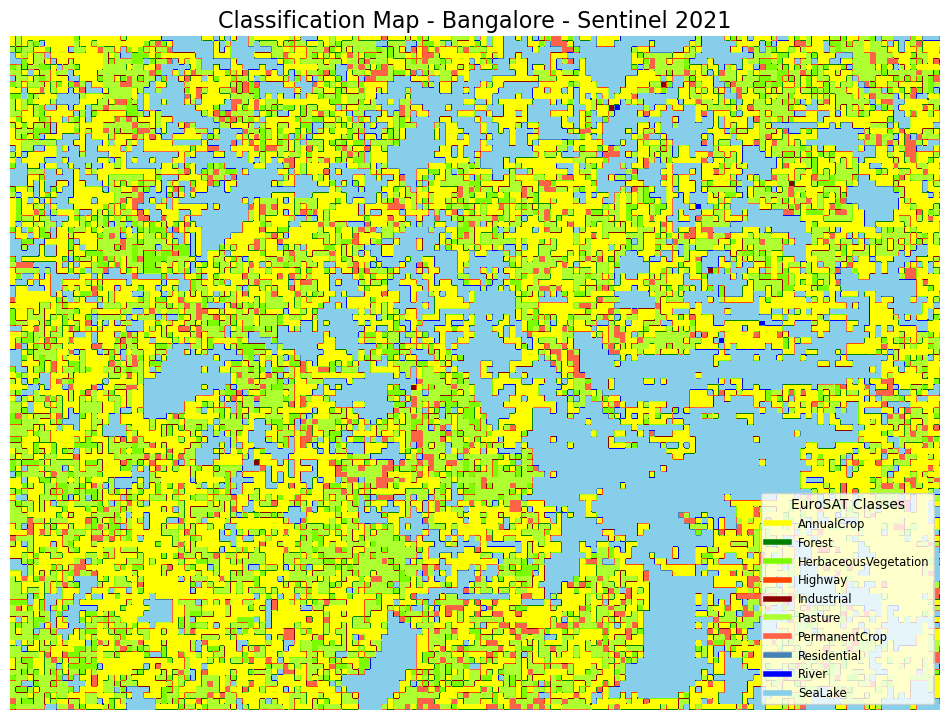

In [34]:
# Plot the classification map
plt.figure(figsize=(12, 12))
plt.imshow(classification_map_3m, cmap=colormap_3m)
plt.title("Classification Map - Bangalore - Sentinel 2021", fontsize=16)
plt.axis("off")

# Add a legend
legend_elements = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=eurosat_classes[i])
                   for i in range(len(eurosat_classes))]
plt.legend(handles=legend_elements, loc='lower right', fontsize='small', title="EuroSAT Classes")
plt.show()

# Segmenation Tasks based on out Segmentation Model Trained on Landcover.ai

In [1]:
from tensorflow.keras.models import load_model

# Define the path to the model
model_path = r"D:\Nitin\MS - AAI\4. Computer Vision\Project\LandCover_Segmentation_Model.keras"

# Load the model
seg_model = load_model(model_path)

# Verify the model is loaded successfully
seg_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_8        │ [(None, 112, 112, │ 14,714,688 │ input_layer_4[0]… │
│ (Functional)        │ 64), (None, 56,   │            │                   │
│                     │ 56, 128), (None,  │            │                   │
│                     │ 28, 28, 256),     │            │                   │
│                     │ (None, 14, 14,    │            │                   │
│                     │ 512), (None, 7,   │            │                   │
│                     │ 7, 512)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_18 │ (None, 14, 14,    │  2,359,808 │ functional_8[0][… │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_16      │ (None, 14, 14,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 1024)             │            │ functional_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 14, 14,    │  4,719,104 │ concatenate_16[0… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_19 │ (None, 28, 28,    │  1,179,904 │ conv2d_20[0][0]   │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_17      │ (None, 28, 28,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 512)              │            │ functional_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 28, 28,    │  1,179,904 │ concatenate_17[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_20 │ (None, 56, 56,    │    295,040 │ conv2d_21[0][0]   │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_18      │ (None, 56, 56,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ functional_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 56, 56,    │    295,040 │ concatenate_18[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_21 │ (None, 112, 112,  │     73,792 │ conv2d_22[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_19      │ (None, 112, 112,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ functional_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 112, 112,  │     73,792 │ concatenate_19[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_22 │ (None, 224, 224,  │     36,928 │ conv2d_23[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                 

 Total params: 74,784,977 (285.28 MB)

 Trainable params: 24,928,325 (95.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,856,652 (190.19 MB)

Loading image: D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2021.jpg
Image loaded successfully. Shape: (5012, 5122, 3)
Image shape: 5012x5122, Creating patches of size 224x224...
Total patches created: 484
Starting patch-wise predictions...


Predicting Patches: 100%|██████████| 484/484 [06:31<00:00,  1.24patch/s]


Patch-wise predictions completed.
Stitching 484 patches back together...
Stitching completed.


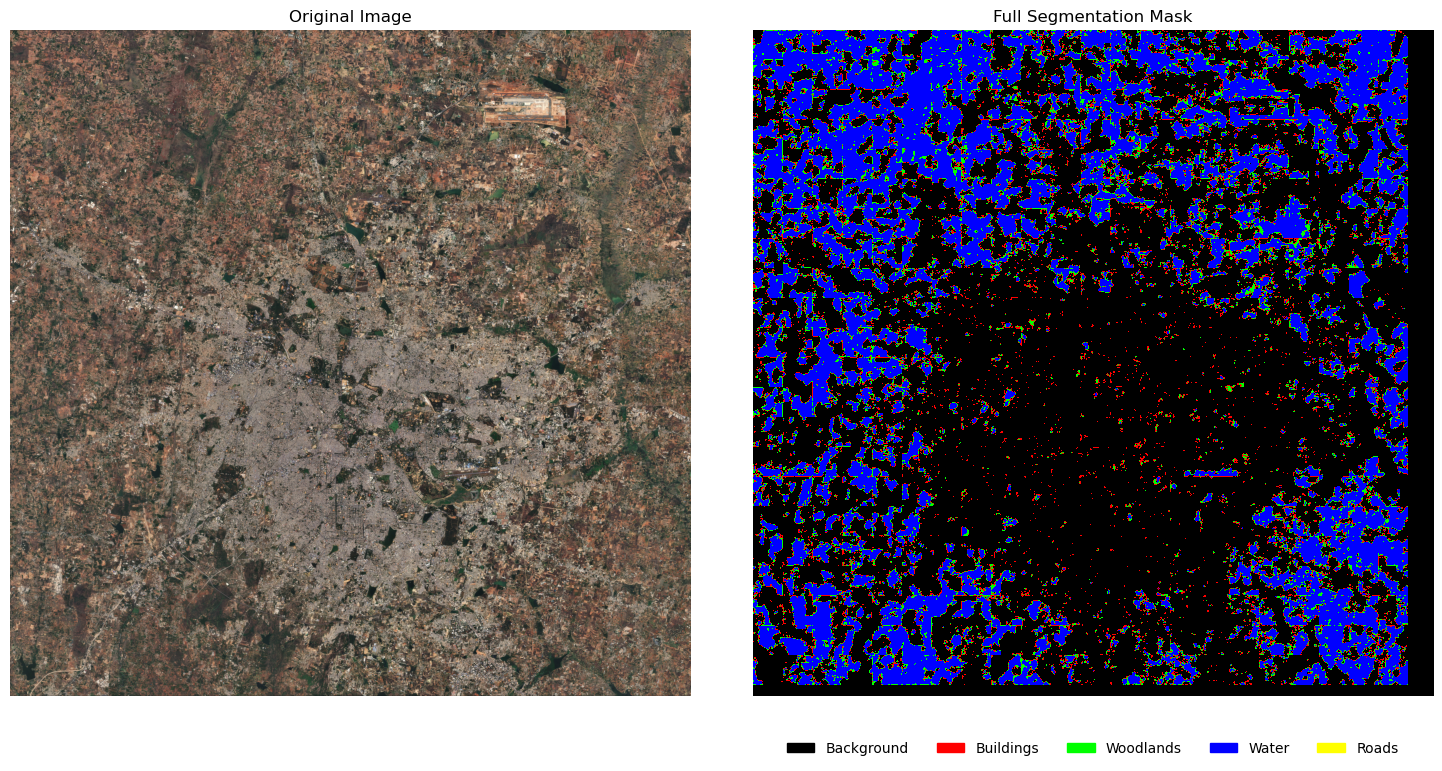

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tqdm import tqdm  # For progress bar
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

# Path to the saved segmentation model
model_path = r"D:\Nitin\MS - AAI\4. Computer Vision\Project\LandCover_Segmentation_Model.keras"
model = load_model(model_path)

# Define class names and corresponding colors
class_names = ["Background", "Buildings", "Woodlands", "Water", "Roads"]
class_colors = [
    (0, 0, 0),        # Black for Background
    (255, 0, 0),      # Red for Buildings
    (0, 255, 0),      # Green for Woodlands
    (0, 0, 255),      # Blue for Water
    (255, 255, 0),    # Yellow for Roads
]
cmap = ListedColormap(np.array(class_colors) / 255.0)  # Normalize colors to [0, 1]

# Function to divide the large image into patches
def create_patches(image, patch_size):
    h, w, _ = image.shape
    patches = []
    coords = []

    print(f"Image shape: {h}x{w}, Creating patches of size {patch_size}x{patch_size}...")

    # Slide over the image with the given patch size
    for y in range(0, h, patch_size):
        for x in range(0, w, patch_size):
            patch = image[y:y+patch_size, x:x+patch_size]
            if patch.shape[:2] == (patch_size, patch_size):  # Ensure valid patch size
                patches.append(patch)
                coords.append((y, x))
    
    print(f"Total patches created: {len(patches)}")
    return patches, coords

# Function to stitch patches back together
def stitch_patches(patches, coords, image_shape, patch_size):
    h, w = image_shape[:2]
    full_mask = np.zeros((h, w), dtype=np.uint8)  # Assuming single-channel output (class indices)

    print(f"Stitching {len(patches)} patches back together...")
    for i, (patch, (y, x)) in enumerate(zip(patches, coords)):
        full_mask[y:y+patch_size, x:x+patch_size] = patch
    
    print("Stitching completed.")
    return full_mask

# Function to perform patch-wise segmentation
def patch_wise_segmentation(image_path, model, patch_size=224):
    print(f"Loading image: {image_path}")
    large_image = cv2.imread(image_path)
    large_image = cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    print(f"Image loaded successfully. Shape: {large_image.shape}")

    # Divide the image into patches
    patches, coords = create_patches(large_image, patch_size)

    # Predict masks for each patch using a progress bar
    predicted_patches = []
    print("Starting patch-wise predictions...")
    for patch in tqdm(patches, desc="Predicting Patches", unit="patch", leave=True):
        patch_normalized = patch / 255.0  # Normalize
        patch_input = np.expand_dims(patch_normalized, axis=0)  # Add batch dimension
        predicted_patch = model.predict(patch_input, verbose=0)[0]  # Suppress per-patch logs
        predicted_patch_class = np.argmax(predicted_patch, axis=-1)  # Convert to class indices
        predicted_patches.append(predicted_patch_class)

    print("Patch-wise predictions completed.")

    # Stitch the predicted patches back together
    full_mask = stitch_patches(predicted_patches, coords, large_image.shape, patch_size)

    return large_image, full_mask

# Function to add a legend for class-wise colors
def add_legend():
    legend_patches = [Patch(color=np.array(color) / 255.0, label=name) for color, name in zip(class_colors, class_names)]
    plt.legend(handles=legend_patches, loc="upper center", ncol=len(class_names), bbox_to_anchor=(0.5, -0.05), frameon=False)

# Test the patch-wise segmentation function
test_image_path = r"D:\Nitin\MS - AAI\4. Computer Vision\Project\Sentinal Images\Sentinel_2021.jpg"
large_image, full_mask = patch_wise_segmentation(test_image_path, model)

# Visualize the results with a legend
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(large_image)
plt.title("Original Image")
plt.axis("off")

# Full segmentation mask with class-wise colors
plt.subplot(1, 2, 2)
plt.imshow(full_mask, cmap=cmap)
plt.title("Full Segmentation Mask")
plt.axis("off")

# Add legend below the plots
add_legend()

plt.tight_layout()
plt.show()